In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
data=pd.read_csv('InputFile.csv')

In [3]:
data.head()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.columns

Index(['Cement', 'Blast Furnace Slag _component_2', 'Fly Ash _component_3',
       'Water_component_4', 'Superplasticizer_component_5',
       'Coarse Aggregate_component_6', 'Fine Aggregate_component_7', 'Age_day',
       'Concrete_compressive _strength'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cement                           1030 non-null   float64
 1   Blast Furnace Slag _component_2  1030 non-null   float64
 2   Fly Ash _component_3             1030 non-null   float64
 3   Water_component_4                1030 non-null   float64
 4   Superplasticizer_component_5     1030 non-null   float64
 5   Coarse Aggregate_component_6     1030 non-null   float64
 6   Fine Aggregate_component_7       1030 non-null   float64
 7   Age_day                          1030 non-null   int64  
 8   Concrete_compressive _strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


### Data Description
Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable 

In [6]:
data.isna().sum()

Cement                             0
Blast Furnace Slag _component_2    0
Fly Ash _component_3               0
Water_component_4                  0
Superplasticizer_component_5       0
Coarse Aggregate_component_6       0
Fine Aggregate_component_7         0
Age_day                            0
Concrete_compressive _strength     0
dtype: int64

In [7]:
data.describe()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
eda=ProfileReport(data)
eda.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
corr=data.corr()

<Axes: >

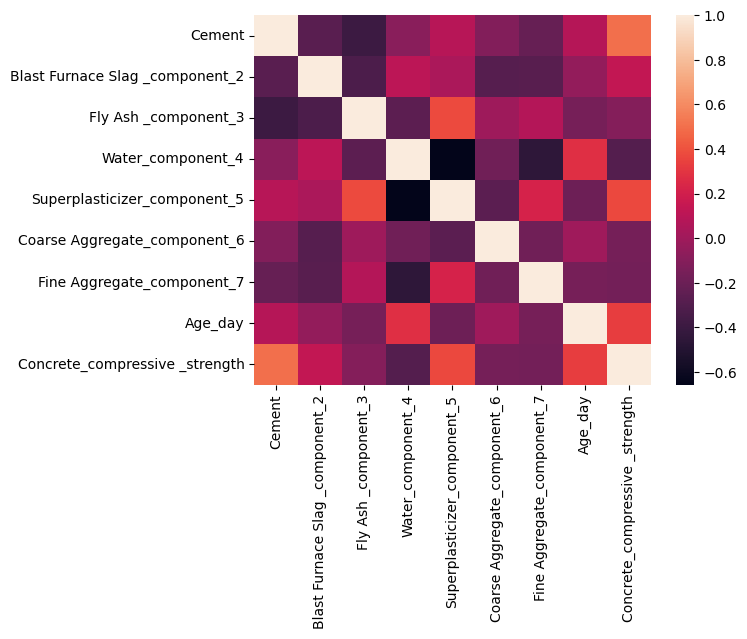

In [17]:
sns.heatmap(corr)

In [18]:
%matplotlib inline

C:\Users\ASUS ZenBook\AppData\Local\Temp\ipykernel_12228\2766635260.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS ZenBook\AppData\Local\Temp\ipykernel_12228\2766635260.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS ZenBook\AppDat

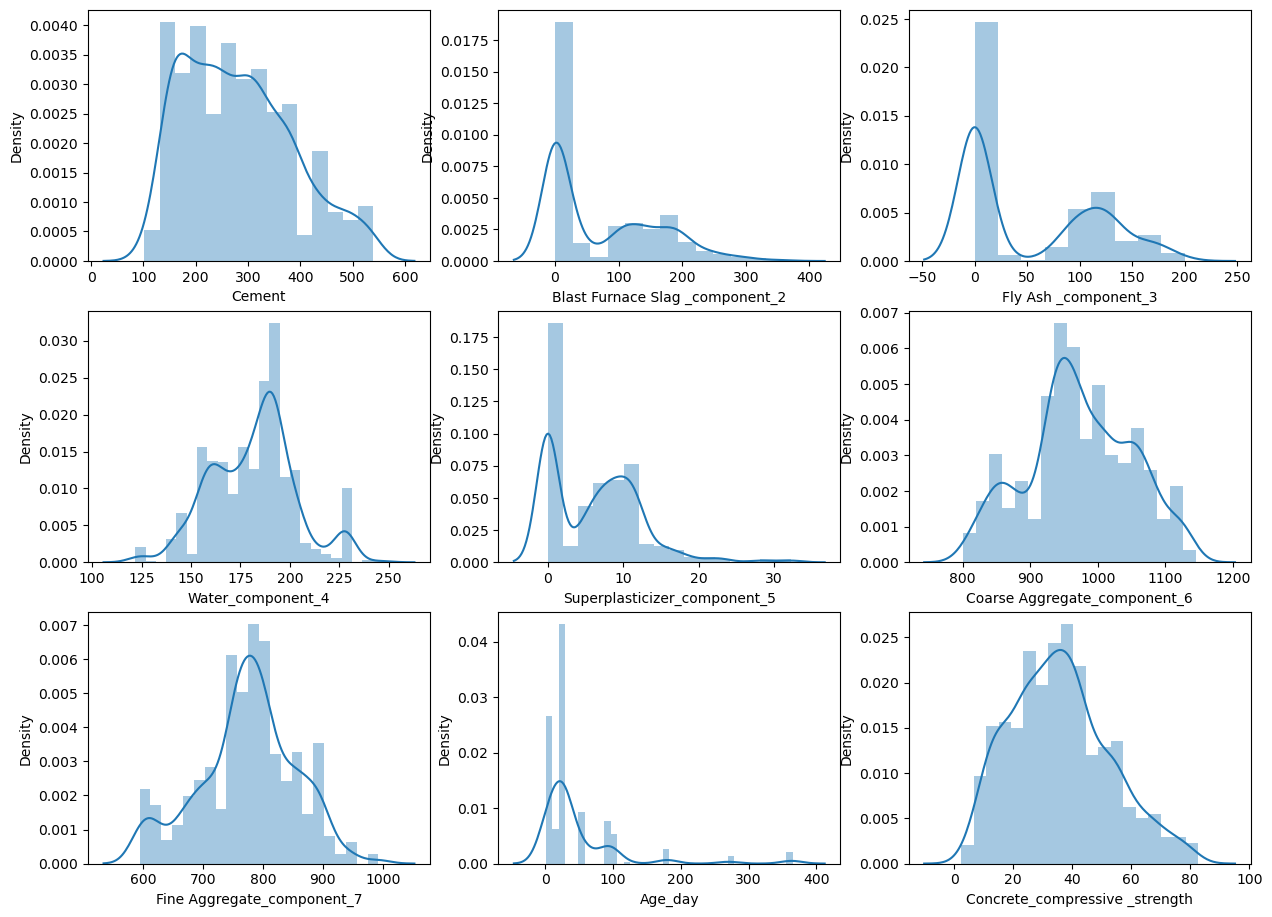

In [19]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1

for column in data.columns:
    ax=plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=(10))
    plotnumber +=1
plt.show()    

In [20]:
# Data Transformation

In [21]:
# log transformation

In [22]:
for column in data.columns:
    if column != 'Concrete_compressive _strength':
        data[column] = np.log1p(data[column])

C:\Users\ASUS ZenBook\AppData\Local\Temp\ipykernel_12228\2442337359.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS ZenBook\AppData\Local\Temp\ipykernel_12228\2442337359.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\ASUS ZenBook\AppDat

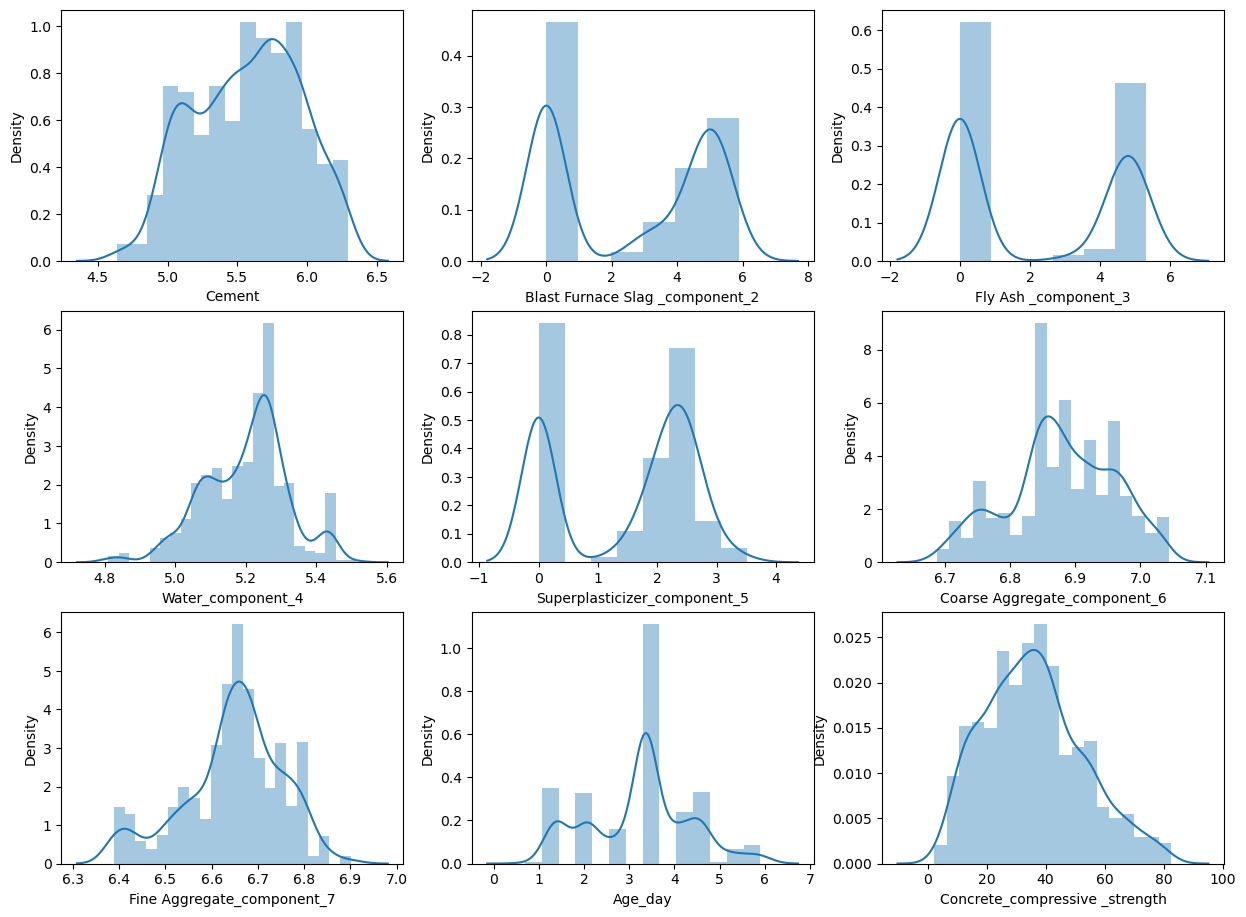

In [23]:
plt.figure(figsize=(15,15))
plotnumber=1
for column in data.columns:
    ax=plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column)
    plotnumber +=1
plt.show()    

In [24]:
data.head()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
0,6.293419,0.000000,0.0,5.093750,1.252763,6.947937,6.517671,3.367296,79.99
1,6.293419,0.000000,0.0,5.093750,1.252763,6.962243,6.517671,3.367296,61.89
2,5.809643,4.966335,0.0,5.433722,0.000000,6.838405,6.388561,5.602119,40.27
3,5.809643,4.966335,0.0,5.433722,0.000000,6.838405,6.388561,5.902633,41.05
4,5.296315,4.893352,0.0,5.262690,0.000000,6.886940,6.717200,5.888878,44.30


In [64]:
X=data.drop(columns='Concrete_compressive _strength')

In [65]:
'''sc=StandardScaler()
X=sc.fit_transform(X)'''

'sc=StandardScaler()\nX=sc.fit_transform(X)'

In [66]:
#joblib.dump(sc,'scalar.pkl')

In [67]:
'''X=pd.DataFrame(X,columns=['Cement', 'Blast Furnace Slag _component_2', 'Fly Ash _component_3',
       'Water_component_4', 'Superplasticizer_component_5',
       'Coarse Aggregate_component_6', 'Fine Aggregate_component_7', 'Age_day'])'''

"X=pd.DataFrame(X,columns=['Cement', 'Blast Furnace Slag _component_2', 'Fly Ash _component_3',\n       'Water_component_4', 'Superplasticizer_component_5',\n       'Coarse Aggregate_component_6', 'Fine Aggregate_component_7', 'Age_day'])"

In [68]:
y=data['Concrete_compressive _strength']

In [69]:
from sklearn.cluster import KMeans

In [70]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\ASUS ZenBook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS ZenBook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\ASUS ZenBook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS ZenBook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wind

In [71]:
wcss

[14612.832276011097,
 8124.674982504574,
 4445.057914153318,
 2429.767007530279,
 1895.3062716866311,
 1634.1451135609948,
 1401.826555093143,
 1216.9687857576585,
 1067.777219644766,
 970.8066781849343]

Text(0, 0.5, 'WCSS')

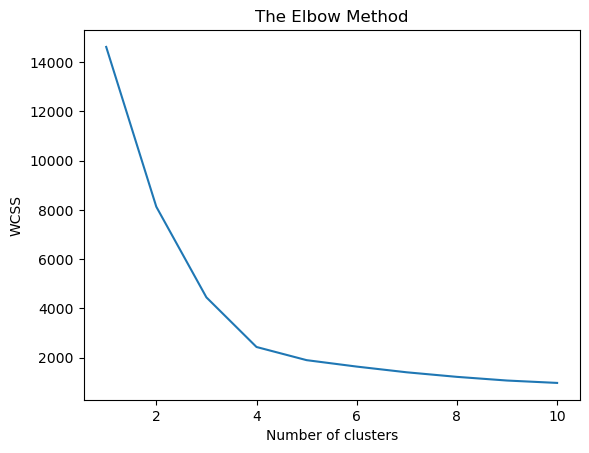

In [72]:
plt.plot(range(1,11),wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [73]:
# finding the value of the optimum cluster programmatically

In [74]:
from kneed import KneeLocator

In [75]:
kn=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [76]:
#The optimum number of clusters
kn.knee

4

In [77]:
kmeans = KMeans(n_clusters=kn.knee, init='k-means++', random_state=42)

In [78]:
cluster_no=kmeans.fit_predict(X)

C:\Users\ASUS ZenBook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS ZenBook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [79]:
silhouette_avg = silhouette_score(X, kmeans.labels_)

In [80]:
silhouette_avg

0.6109517020288241

In [82]:
import pickle

In [83]:
pickle.dump(kmeans,open('KMean_cluster.pkl','wb'))

In [84]:
data['cluster']=cluster_no

In [87]:
data.head()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength,cluster
0,6.293419,0.000000,0.0,5.093750,1.252763,6.947937,6.517671,3.367296,79.99,0
1,6.293419,0.000000,0.0,5.093750,1.252763,6.962243,6.517671,3.367296,61.89,0
2,5.809643,4.966335,0.0,5.433722,0.000000,6.838405,6.388561,5.602119,40.27,1
3,5.809643,4.966335,0.0,5.433722,0.000000,6.838405,6.388561,5.902633,41.05,1
4,5.296315,4.893352,0.0,5.262690,0.000000,6.886940,6.717200,5.888878,44.30,1


In [89]:
data['cluster'].value_counts()

cluster
1    334
3    239
0    232
2    225
Name: count, dtype: int64

In [90]:
data.to_csv('cluster_data.csv',index='False')

In [102]:
data[data['cluster']==3]

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength,cluster
2,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.602119,40.27,3
3,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.902633,41.05,3
4,5.296315,4.893352,0.000000,5.262690,0.000000,6.886940,6.717200,5.888878,44.30,3
5,5.587249,4.744932,0.000000,5.433722,0.000000,6.838405,6.508769,4.510860,47.03,3
6,5.942799,4.564348,0.000000,5.433722,0.000000,6.838405,6.388561,5.902633,43.70,3
...,...,...,...,...,...,...,...,...,...,...
1014,4.890349,5.335131,5.086979,5.192401,1.871802,6.766077,6.602045,3.367296,33.31,3
1019,4.946630,5.105339,4.857484,5.471009,1.916923,6.768033,6.487075,3.367296,35.23,3
1023,5.080161,5.525453,0.000000,5.132263,2.580217,6.956831,6.535532,3.367296,39.46,3
1027,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,3.367296,23.70,3
